# installed nltk on cmd && use it for analyzing people's emotions

In [3]:
print ("")
print ("Developed by:")
print ("++++++---++++++++++++---++++++++++++---++++++++++++---++++---++++++++++++---++++++++++++---++++++++++++---+")
print ("+  ___        ___         ___          _          _     ________           ___          _________         -")
print ("+ |   \      /   |       / _ \        | |        | |   |  ____  \         / _ \        |  ______ \        +")
print ("- | |\ \    / /  |      / /-\ \       | |________| |   | |____|  |       / /_\ \       | |      \ \        ")
print ("+ | | \ \  / / | |     / _____ \      |  ________  |   |  ____  /       / _____ \      | |      | |       +")
print ("- | |  \ \/ /  | |    / /     \ \     | |        | |   | |    \ \      / /     \ \     | |______/ /        ")
print ("+ |_|   \__/   |_|   /_/       \_\    |_|        |_|   | |     \_\    /_/       \_\    |_________/        +")
print ("-                                                                                                         -")
print ("++++++---++++++++++++---++++++++++++---++++++++++++---++++---++++++++++++---++++++++++++---++++++++++++---+")
print ("")


Developed by:
++++++---++++++++++++---++++++++++++---++++++++++++---++++---++++++++++++---++++++++++++---++++++++++++---+
+  ___        ___         ___          _          _     ________           ___          _________         -
+ |   \      /   |       / _ \        | |        | |   |  ____  \         / _ \        |  ______ \        +
- | |\ \    / /  |      / /-\ \       | |________| |   | |____|  |       / /_\ \       | |      \ \        
+ | | \ \  / / | |     / _____ \      |  ________  |   |  ____  /       / _____ \      | |      | |       +
- | |  \ \/ /  | |    / /     \ \     | |        | |   | |    \ \      / /     \ \     | |______/ /        
+ |_|   \__/   |_|   /_/       \_\    |_|        |_|   | |     \_\    /_/       \_\    |_________/        +
-                                                                                                         -
++++++---++++++++++++---++++++++++++---++++++++++++---++++---++++++++++++---++++++++++++---++++++++++++---+



In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Read the data
df = pd.read_csv('C:\\Users\\mr.true\\Desktop\\Reviews.csv')#.csv file was saved this lacation
# Look at the top 5 rows of the data
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
# Understand the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
# Looking at the summary of the reviews.
df.Summary.head(5)

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [7]:
# Looking at the description of the reviews
df.Text.head(5)

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

### پیش پردازش متن نظرات کاربران آمازون

In [8]:
# Import libraries
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [11]:
# Lower casing and removing punctuations
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]',"")
df.Text.head(5)

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object

In [12]:
# Removal of stop words
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Text.head(5)

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [14]:
# Lemmatization
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).
lemmatize() for word in x.split()]))
df.Text.head(5)

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around century light pillowy citrus...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [15]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df
# Dropping null values
reviews.dropna(inplace=True)

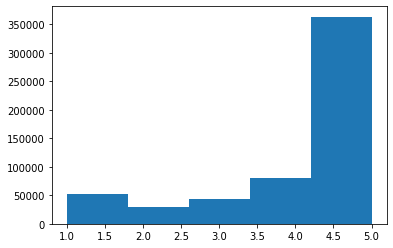

Score
1     52264
2     29743
3     42638
4     80655
5    363111
Name: Id, dtype: int64


In [16]:
# The histogram reveals this dataset is highly unbalanced towards high rating.
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [17]:
# To make it balanced data, we sampled each score by the lowest n-count from above. (i.e. 29743 reviews scored as '2')
score_1 = reviews[reviews['Score'] == 1].sample(n=29743)
score_2 = reviews[reviews['Score'] == 2].sample(n=29743)
score_3 = reviews[reviews['Score'] == 3].sample(n=29743)
score_4 = reviews[reviews['Score'] == 4].sample(n=29743)
score_5 = reviews[reviews['Score'] == 5].sample(n=29743)

In [18]:
# Here we recreate a 'balanced' dataset.
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,
score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

In [19]:
# Printing count by 'Score' to check dataset is now balanced.
print(reviews_sample.groupby('Score').count().Id)

Score
1    29743
2    29743
3    29743
4    29743
5    29743
Name: Id, dtype: int64


In [21]:
# Let's build a word cloud looking at the 'Summary' text
from wordcloud import WordCloud
from wordcloud import STOPWORDS

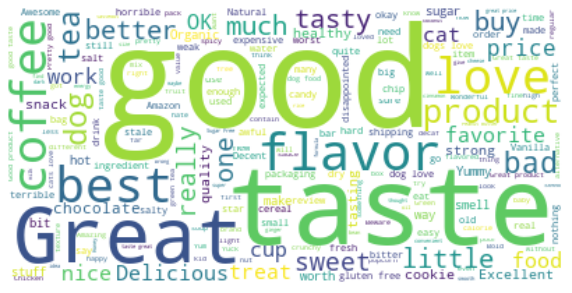

In [26]:
# Wordcloud function's input needs to be a single string of text.
# Here I'm concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color = 'white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or #5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5])]
# Transform to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

In [29]:
# Create wordclouds
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)


Text(0.5, 1.0, 'Reviews with Negative Scores')

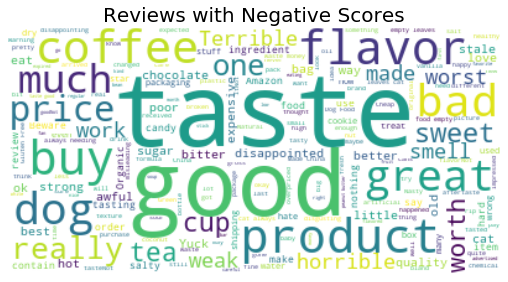

In [30]:
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

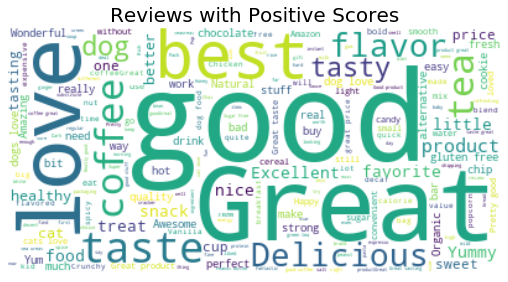

In [32]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

In [33]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
nltk.download('vader_lexicon')

In [40]:
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [41]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)


In [42]:
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head(5)

,compound,neg,neu,pos
0,0.9413,0.000,0.503,0.497
1,-0.1027,0.129,0.762,0.110
2,0.8624,0.132,0.576,0.292
3,0.4404,0.000,0.854,0.146
4,0.9468,0.000,0.369,0.631


In [44]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound,neg,neu,pos
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.9413,0.000,0.503,0.497
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,-0.1027,0.129,0.762,0.110
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.8624,0.132,0.576,0.292


In [45]:
# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive', 'Negative')
df_c.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound,neg,neu,pos,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.9413,0.000,0.503,0.497,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,-0.1027,0.129,0.762,0.110,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.8624,0.132,0.576,0.292,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.4404,0.000,0.854,0.146,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,0.9468,0.000,0.369,0.631,Positive


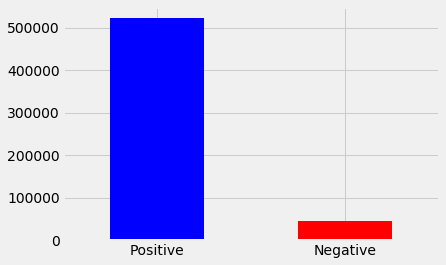

In [47]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0,color= ["b", "r"]);

In [ ]:
df_c.to_csv('C:\\Users\\mr.true\\Desktop\\تحلیل احساسات.csv')